# Part I - DOT Flights Exploration
## by Bader AlMutlaq

## Introduction
The dataset name is "Reporting Carrier On-Time Performance Data." This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays from 1987 to 2022 provided by The U.S. Department of Transportation's (DOT). The dataset contains around 2M records of flights and 109 features for tracking flights info. The dataset can be downloaded from [here](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr) and a description of all the features is available [here](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ)

## Preliminary Wrangling


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [6]:
# Load the dataset
zipfile_path = "./airline_2m.zip"
with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
    zip_ref.extractall()
df = pd.read_csv("airline_2m.csv", encoding="ISO-8859-1")


/var/folders/6c/pm7g0lgx2hdd2gb8p0_k5m980000gn/T/ipykernel_19023/461800662.py:5: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airline_2m.csv", encoding="ISO-8859-1")


In [7]:
# dataset rows and columns
df.shape

(2000000, 109)

In [8]:
# Display the dataset information
df.info(verbose=True, max_cols=130)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 109 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    Year                             int64  
 1    Quarter                          int64  
 2    Month                            int64  
 3    DayofMonth                       int64  
 4    DayOfWeek                        int64  
 5    FlightDate                       object 
 6    Reporting_Airline                object 
 7    DOT_ID_Reporting_Airline         int64  
 8    IATA_CODE_Reporting_Airline      object 
 9    Tail_Number                      object 
 10   Flight_Number_Reporting_Airline  int64  
 11   OriginAirportID                  int64  
 12   OriginAirportSeqID               int64  
 13   OriginCityMarketID               int64  
 14   Origin                           object 
 15   OriginCityName                   object 
 16   OriginState                      o

In [9]:
# Displaying the first five rows
pd.set_option('display.max_columns', None)
df.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,NaN,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,NaN,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,1630,1644.0,14.0,14.0,0.0,0.0,1600-1659,9.0,1653.0,1936.0,6.0,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1305,1305.0,0.0,0.0,0.0,0.0,1300-1359,23.0,1328.0,2008.0,7.0,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,1820,1911.0,51.0,51.0,1.0,3.0,1800-1859,19.0,1930.0,2050.0,8.0,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,NaN,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
# Displaying missing values per column
df.isna().sum()

Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
                     ...   
Div5WheelsOn        2000000
Div5TotalGTime      2000000
Div5LongestGTime    2000000
Div5WheelsOff       2000000
Div5TailNum         2000000
Length: 109, dtype: int64

In [11]:
# Diplaying the total number of missing values in the dataset
df.isna().sum().sum()


np.int64(108997764)

In [12]:
# Displaying all the features in the dataset.
df.columns.values

array(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips',
       'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'C

In [13]:
# columns that contina missing values
df.columns[df.isna().any()]

Index(['Tail_Number', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'DestState', 'DestStateFips', 'DestStateName', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime',
       'DivAirportLandings', 'DivReachedDest', 'DivActualElapsedTime',
       'DivArrDelay', 'DivDistance', 'Div1Airport', 'Div1AirportID',
       'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
       'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport',
       'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime',
       'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum', 'Div3Airport'

### What is the structure of your dataset?

The data set contins large number of records and features (2000000, 109). Some of the features do not contina any data. The data set is missing a lot of data in some columns which need to be addressed before the analysis. Some of the columns have mixed datatypes. 

### What is/are the main feature(s) of interest in your dataset?
I am intrested in the flight delay features and understanding what factores affect the flight delay.<br>
We will only focus on a subset of the features that helps in the analysis. the features of intrest are: 
```code
features = [

    # Time Features
    "Year", "Quarter", "Month", "DayofMonth", "DayOfWeek", "FlightDate", "CRSDepTime", "CRSArrTime",
    
    # Actual Departure and Arrival Times
    "DepTime", "ArrTime",
    
    # Delay and Duration Features
    "DepDelayMinutes", "ArrDelayMinutes", "CRSElapsedTime", "ActualElapsedTime", "AirTime", "Distance", "DistanceGroup",
    
    # Delay Causes
    "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay",
    
    # Geographic Features
    "Origin", "Dest", "OriginStateName", "DestStateName"
]

```

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the weather will have a huge affect on the flight delay. Also other features could impact the delay like the month where some airports might be busy on season.

### Preparing the dataset
before we explore we will filter the dataset to include only features of intrest. Also we will filter it to include only the fights from 2000 - 2020 as a sample since the dataset contains large number of records.

#### Filtering the data sets on the features of intrest and dates

In [14]:
features = [
    # Time Features
    "Year",
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "FlightDate",
    "CRSDepTime",
    "CRSArrTime",
    # Actual Departure and Arrival Times
    "DepTime",
    "ArrTime",
    # Delay and Duration Features
    "DepDelayMinutes",
    "ArrDelayMinutes",
    "CRSElapsedTime",
    "ActualElapsedTime",
    "AirTime",
    "Distance",
    "DistanceGroup",
    # Delay Causes
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
    # Geographic Features
    "Origin",
    "Dest",
    "OriginStateName",
    "DestStateName",
]

# feltring the dataset
df = df[features]
df.shape

(2000000, 26)

In [15]:
# Including all the flights from 2000 and upward.
df_cleaned = df[df["Year"] >= 2000]
# freeing the df memory
del df
# Reseting the index
df_cleaned.reset_index(drop=True, inplace=True)

In [16]:
# Displaying the filtered dataset
df_cleaned.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelayMinutes,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin,Dest,OriginStateName,DestStateName
0,2009,2,5,28,4,2009-05-28,1204,1541,1202.0,1541.0,0.0,0.0,157.0,159.0,141.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,MKE,MCO,Wisconsin,Florida
1,2013,2,6,29,6,2013-06-29,1630,1945,1644.0,1942.0,14.0,0.0,135.0,118.0,103.0,773.0,4,NaN,NaN,NaN,NaN,NaN,GJT,DFW,Colorado,Texas
2,2010,3,8,31,2,2010-08-31,1305,2035,1305.0,2015.0,0.0,0.0,270.0,250.0,220.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,LAX,DTW,California,Michigan
3,2006,1,1,15,7,2006-01-15,1820,2026,1911.0,2058.0,51.0,32.0,126.0,107.0,80.0,529.0,3,0.0,0.0,0.0,0.0,32.0,EWR,CLT,New Jersey,North Carolina
4,2006,3,8,7,1,2006-08-07,1755,2000,1751.0,2002.0,0.0,2.0,125.0,131.0,94.0,563.0,3,NaN,NaN,NaN,NaN,NaN,BOS,CLE,Massachusetts,Ohio


#### Dealing with null values

In [17]:
# Getting the number of null values per column.
df_cleaned.isna().sum()

Year                       0
Quarter                    0
Month                      0
DayofMonth                 0
DayOfWeek                  0
FlightDate                 0
CRSDepTime                 0
CRSArrTime                 0
DepTime                25213
ArrTime                27178
DepDelayMinutes        25276
ArrDelayMinutes        28705
CRSElapsedTime            28
ActualElapsedTime      28679
AirTime                28680
Distance                   0
DistanceGroup              0
CarrierDelay         1117207
WeatherDelay         1117207
NASDelay             1117207
SecurityDelay        1117207
LateAircraftDelay    1117207
Origin                     0
Dest                       0
OriginStateName            0
DestStateName              0
dtype: int64

Since the number of records is large and the missing values are in columns of intrest we will just drop the rows that have missing values.

In [18]:
df_cleaned.dropna(axis=0, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221794 entries, 0 to 221793
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               221794 non-null  int64  
 1   Quarter            221794 non-null  int64  
 2   Month              221794 non-null  int64  
 3   DayofMonth         221794 non-null  int64  
 4   DayOfWeek          221794 non-null  int64  
 5   FlightDate         221794 non-null  object 
 6   CRSDepTime         221794 non-null  int64  
 7   CRSArrTime         221794 non-null  int64  
 8   DepTime            221794 non-null  float64
 9   ArrTime            221794 non-null  float64
 10  DepDelayMinutes    221794 non-null  float64
 11  ArrDelayMinutes    221794 non-null  float64
 12  CRSElapsedTime     221794 non-null  float64
 13  ActualElapsedTime  221794 non-null  float64
 14  AirTime            221794 non-null  float64
 15  Distance           221794 non-null  float64
 16  Di

Now we have 221794 flight record with no missing values

#### Datatypes 
We will change some of the features datatypes which will be helpfull for the analysis

In [19]:
# getting the maximum value in each numeric column.
df_cleaned.max(numeric_only=True)

Year                 2020.0
Quarter                 4.0
Month                  12.0
DayofMonth             31.0
DayOfWeek               7.0
CRSDepTime           2359.0
CRSArrTime           2359.0
DepTime              2400.0
ArrTime              2400.0
DepDelayMinutes      1878.0
ArrDelayMinutes      1898.0
CRSElapsedTime        690.0
ActualElapsedTime     713.0
AirTime               686.0
Distance             4983.0
DistanceGroup          11.0
CarrierDelay         1878.0
WeatherDelay         1847.0
NASDelay             1343.0
SecurityDelay         219.0
LateAircraftDelay    1407.0
dtype: float64

In [20]:
# reducing the size of the columns since they fit in the range of int32
df_cleaned["Year"] = df_cleaned["Year"].astype("int32")
df_cleaned["Quarter"] = df_cleaned["Quarter"].astype("int32")
df_cleaned["Month"] = df_cleaned["Month"].astype("int32")
df_cleaned["DayofMonth"] = df_cleaned["DayofMonth"].astype("int32")
df_cleaned["DayOfWeek"] = df_cleaned["DayOfWeek"].astype("int32")
df_cleaned["DistanceGroup"] = df_cleaned["DistanceGroup"].astype("int32")

# These columns are float but they represent minutes so we will convert them to int32.
df_cleaned["DepDelayMinutes"] = df_cleaned["DepDelayMinutes"].astype("int32")
df_cleaned["ArrDelayMinutes"] = df_cleaned["ArrDelayMinutes"].astype("int32")
df_cleaned["CRSElapsedTime"] = df_cleaned["CRSElapsedTime"].astype("int32")
df_cleaned["ActualElapsedTime"] = df_cleaned["ActualElapsedTime"].astype("int32")
df_cleaned["AirTime"] = df_cleaned["AirTime"].astype("int32")
df_cleaned["CarrierDelay"] = df_cleaned["CarrierDelay"].astype("int32")
df_cleaned["WeatherDelay"] = df_cleaned["WeatherDelay"].astype("int32")
df_cleaned["NASDelay"] = df_cleaned["NASDelay"].astype("int32")
df_cleaned["SecurityDelay"] = df_cleaned["SecurityDelay"].astype("int32")
df_cleaned["LateAircraftDelay"] = df_cleaned["LateAircraftDelay"].astype("int32")

# Convert these string columns to category to save memory.
df_cleaned["Origin"] = df_cleaned["Origin"].astype("category")
df_cleaned["Dest"] = df_cleaned["Dest"].astype("category")
df_cleaned["OriginStateName"] = df_cleaned["OriginStateName"].astype("category")
df_cleaned["DestStateName"] = df_cleaned["DestStateName"].astype("category")

# These columns represent time as hh:mm we will convert them to int
df_cleaned["CRSDepTime"] = df_cleaned["CRSDepTime"].astype("int32")
df_cleaned["CRSArrTime"] = df_cleaned["CRSArrTime"].astype("int32")
df_cleaned["DepTime"] = df_cleaned["DepTime"].astype("int32")
df_cleaned["ArrTime"] = df_cleaned["ArrTime"].astype("int32")

# Convert the times to datetime
df_cleaned["FlightDate"] = pd.to_datetime(df_cleaned["FlightDate"])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221794 entries, 0 to 221793
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               221794 non-null  int32         
 1   Quarter            221794 non-null  int32         
 2   Month              221794 non-null  int32         
 3   DayofMonth         221794 non-null  int32         
 4   DayOfWeek          221794 non-null  int32         
 5   FlightDate         221794 non-null  datetime64[ns]
 6   CRSDepTime         221794 non-null  int32         
 7   CRSArrTime         221794 non-null  int32         
 8   DepTime            221794 non-null  int32         
 9   ArrTime            221794 non-null  int32         
 10  DepDelayMinutes    221794 non-null  int32         
 11  ArrDelayMinutes    221794 non-null  int32         
 12  CRSElapsedTime     221794 non-null  int32         
 13  ActualElapsedTime  221794 non-null  int32   

To convert `'CRSDepTime',	'CRSArrTime',	'DepTime'	,'ArrTime'` columns we need extra processing since the time is represented as a number where 5 means 05:00 and 1234 means 12:34

In [21]:
def convert_to_time(x):
    """
    Converts a time represented as an integer or float in the format HHMM (e.g., 1030 for 10:30)
    into a string formatted as HH:MM.

    Parameters:
    x (int or float): The time in HHMM format (e.g., 1030, 830.0, etc.).

    Returns:
    str: The time formatted as HH:MM.
    """
    x = int(x)  # Ensure it's an integer
    hours = x // 100  # Extract the hours
    minutes = x % 100  # Extract the minutes
    if hours == 24 and minutes == 0:
        return "00:00"  # Handle "24:00" case
    return (
        f"{hours:02d}:{minutes:02d}"  # Format as HH:MM with leading zeros if necessary
    )

In [22]:
# Applying the function to change the columns to HH:MM format.
df_cleaned['CRSDepTime'] = df_cleaned['CRSDepTime'].apply(convert_to_time)
df_cleaned['CRSArrTime'] = df_cleaned['CRSArrTime'].apply(convert_to_time)
df_cleaned['DepTime'] = df_cleaned['DepTime'].apply(convert_to_time)
df_cleaned['ArrTime'] = df_cleaned['ArrTime'].apply(convert_to_time)
df_cleaned[['CRSDepTime',	'CRSArrTime',	'DepTime'	,'ArrTime']].head()

,CRSDepTime,CRSArrTime,DepTime,ArrTime
0,18:20,20:26,19:11,20:58
1,19:50,20:57,23:31,00:31
2,20:30,22:50,20:46,23:19
3,18:58,20:21,19:50,21:05
4,13:42,14:53,13:52,15:10


In [23]:
# insuring that 24:00 is represented as 00;00
df_cleaned["CRSDepTime"] = df_cleaned["CRSDepTime"].replace("24:00", "00:00")
df_cleaned["CRSArrTime"] = df_cleaned["CRSArrTime"].replace("24:00", "00:00")
df_cleaned["DepTime"] = df_cleaned["DepTime"].replace("24:00", "00:00")
df_cleaned["ArrTime"] = df_cleaned["ArrTime"].replace("24:00", "00:00")

# Now convert them to time objects
df_cleaned["CRSDepTime"] = pd.to_datetime(
    df_cleaned["CRSDepTime"], format="%H:%M"
).dt.time
df_cleaned["CRSArrTime"] = pd.to_datetime(
    df_cleaned["CRSArrTime"], format="%H:%M"
).dt.time
df_cleaned["DepTime"] = pd.to_datetime(df_cleaned["DepTime"], format="%H:%M").dt.time
df_cleaned["ArrTime"] = pd.to_datetime(df_cleaned["ArrTime"], format="%H:%M").dt.time

# Display the cleaned DataFrame with time columns
df_cleaned[["CRSDepTime", "CRSArrTime", "DepTime", "ArrTime"]].head()

,CRSDepTime,CRSArrTime,DepTime,ArrTime
0,18:20:00,20:26:00,19:11:00,20:58:00
1,19:50:00,20:57:00,23:31:00,00:31:00
2,20:30:00,22:50:00,20:46:00,23:19:00
3,18:58:00,20:21:00,19:50:00,21:05:00
4,13:42:00,14:53:00,13:52:00,15:10:00


In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221794 entries, 0 to 221793
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               221794 non-null  int32         
 1   Quarter            221794 non-null  int32         
 2   Month              221794 non-null  int32         
 3   DayofMonth         221794 non-null  int32         
 4   DayOfWeek          221794 non-null  int32         
 5   FlightDate         221794 non-null  datetime64[ns]
 6   CRSDepTime         221794 non-null  object        
 7   CRSArrTime         221794 non-null  object        
 8   DepTime            221794 non-null  object        
 9   ArrTime            221794 non-null  object        
 10  DepDelayMinutes    221794 non-null  int32         
 11  ArrDelayMinutes    221794 non-null  int32         
 12  CRSElapsedTime     221794 non-null  int32         
 13  ActualElapsedTime  221794 non-null  int32   

*Now all the columns are of appropriate types for the analysis. We are ready to explore the dataset*

## Univariate Exploration
First we will look at the distribution of the main variables of intrest `DepDelayMinutes` and `ArrDelayMinutes`

Text(0.5, 0, 'Departure Delay (m)')

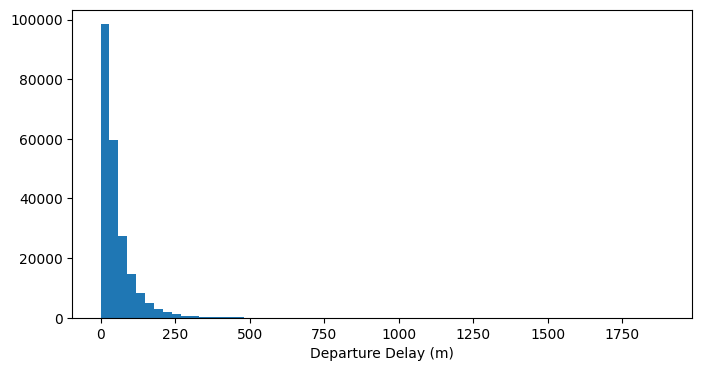

In [25]:
plt.figure(figsize=(8, 4))
binsize = 30
# Setting each bins to 30 minutes
bins = np.arange(0, df_cleaned["DepDelayMinutes"].max() + binsize, binsize)
plt.hist(data=df_cleaned, x="DepDelayMinutes", bins=bins);
plt.xlabel("Departure Delay (m)")

Text(0.5, 0, 'Arrival Delay (m)')

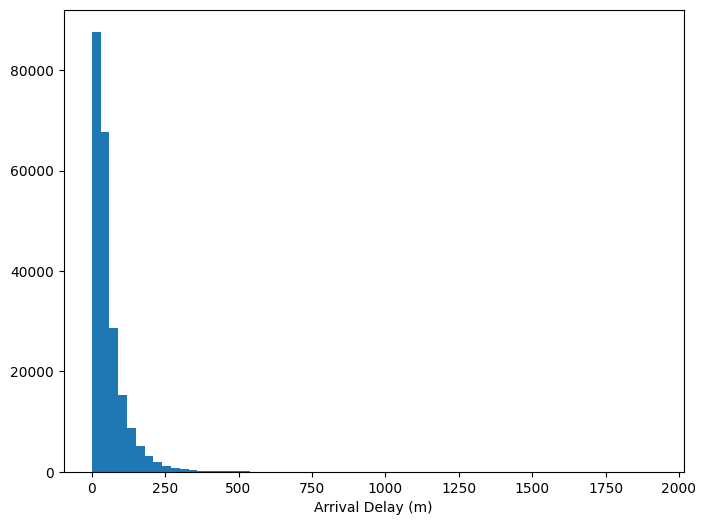

In [26]:
plt.figure(figsize=(8, 6))
# Setting the bins to 30 minutes
bins = np.arange(0, df_cleaned["ArrDelayMinutes"].max() + binsize, binsize)
plt.hist(data=df_cleaned, x="ArrDelayMinutes", bins=bins);
plt.xlabel("Arrival Delay (m)")

The distributions are fairly simlar and we can see that there is a long tail in them.

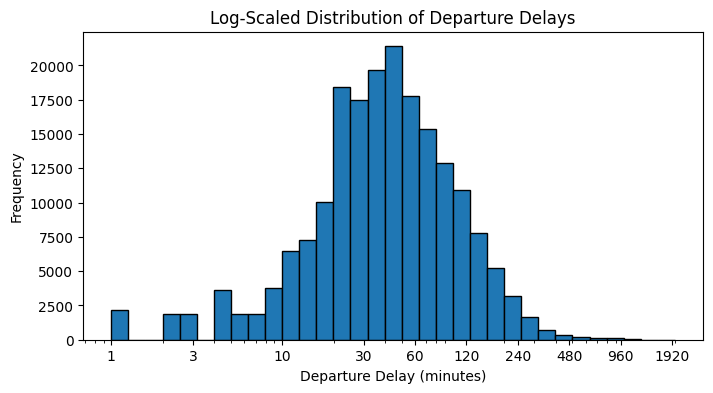

In [27]:
binsize = 0.1  # Logarithmic bin size

# Create logarithmic bins
bins = 10 ** np.arange(
    0, np.log10(df_cleaned["DepDelayMinutes"].max()) + binsize, binsize
)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(df_cleaned["DepDelayMinutes"], bins=bins, edgecolor="black")

# Set log scale for x-axis
plt.xscale("log")

# Define ticks on the x-axis for better readability
xticks = [1, 3, 10, 30, 60, 120, 240, 480, 960, 1920]
plt.xticks(ticks=xticks, labels=xticks)

# Add labels and title
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Log-Scaled Distribution of Departure Delays")
plt.show()

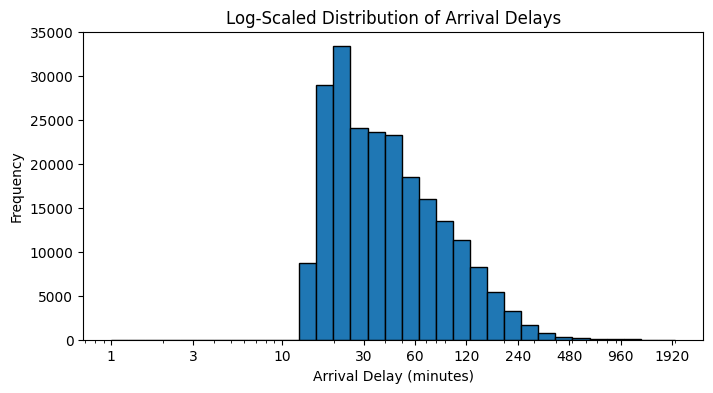

In [28]:
binsize = 0.1  # Logarithmic bin size

# Create logarithmic bins
bins = 10 ** np.arange(
    0, np.log10(df_cleaned["ArrDelayMinutes"].max()) + binsize, binsize
)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(df_cleaned["ArrDelayMinutes"], bins=bins, edgecolor="black")

# Set log scale for x-axis
plt.xscale("log")

# Define ticks on the x-axis for better readability
xticks = [1, 3, 10, 30, 60, 120, 240, 480, 960, 1920]
plt.xticks(ticks=xticks, labels=xticks)

# Add labels and title
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Log-Scaled Distribution of Arrival Delays")
plt.show()

Both distributions had long tails and they were similar before scaling. After scaling we can see that the departure delay follow some normal distribution while the arrival delay remains somewhat skewed which could indicate that small arrival delays do not occur more often.

We will move to the month, day of the month and day of the week to see the number of flights and how are the distributed across the days and months 

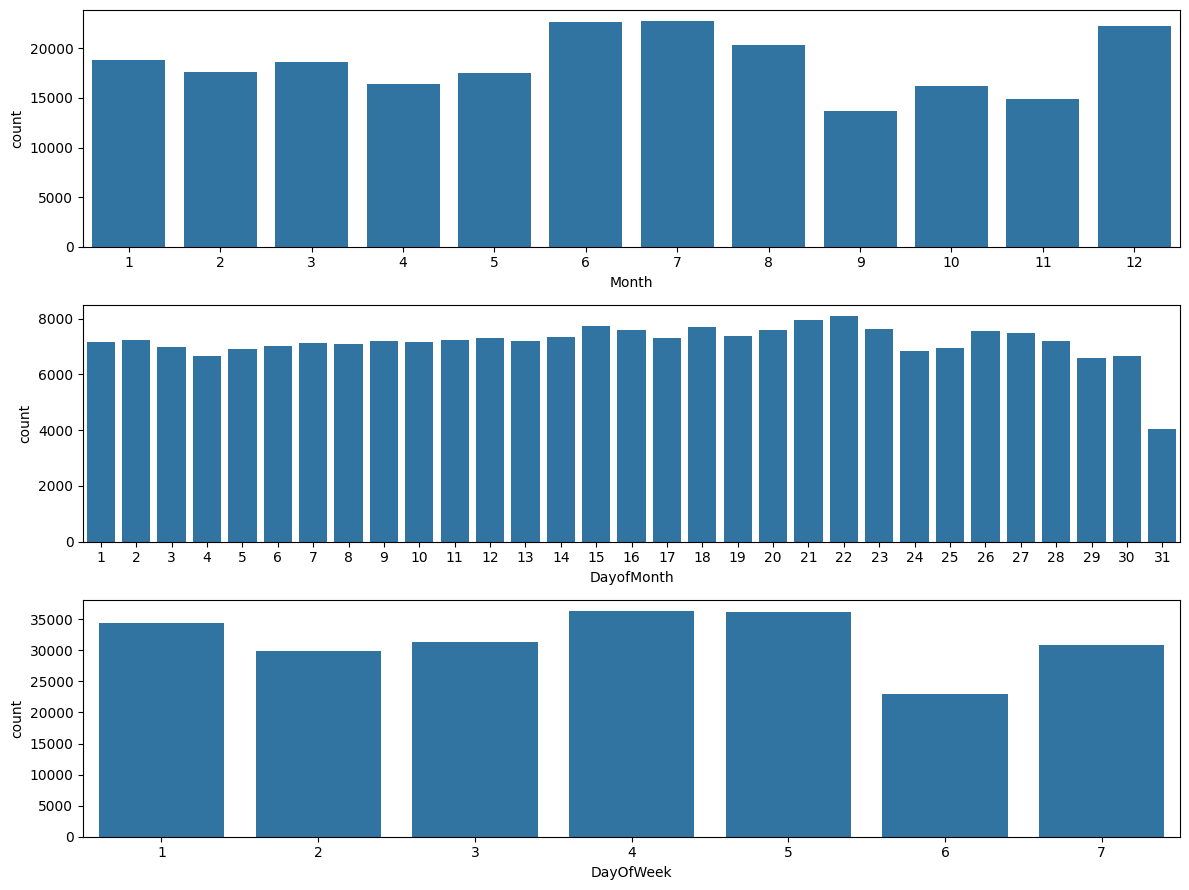

In [29]:
fig, ax = plt.subplots(nrows=3, figsize = [12,9])

default_color = sns.color_palette()[0]
sns.countplot(data = df_cleaned, x = 'Month', color = default_color, ax = ax[0])
sns.countplot(data = df_cleaned, x = 'DayofMonth', color = default_color, ax = ax[1])
sns.countplot(data = df_cleaned, x = 'DayOfWeek', color = default_color, ax = ax[2])

plt.tight_layout()
plt.show()

*Let normalize to see the proportions*

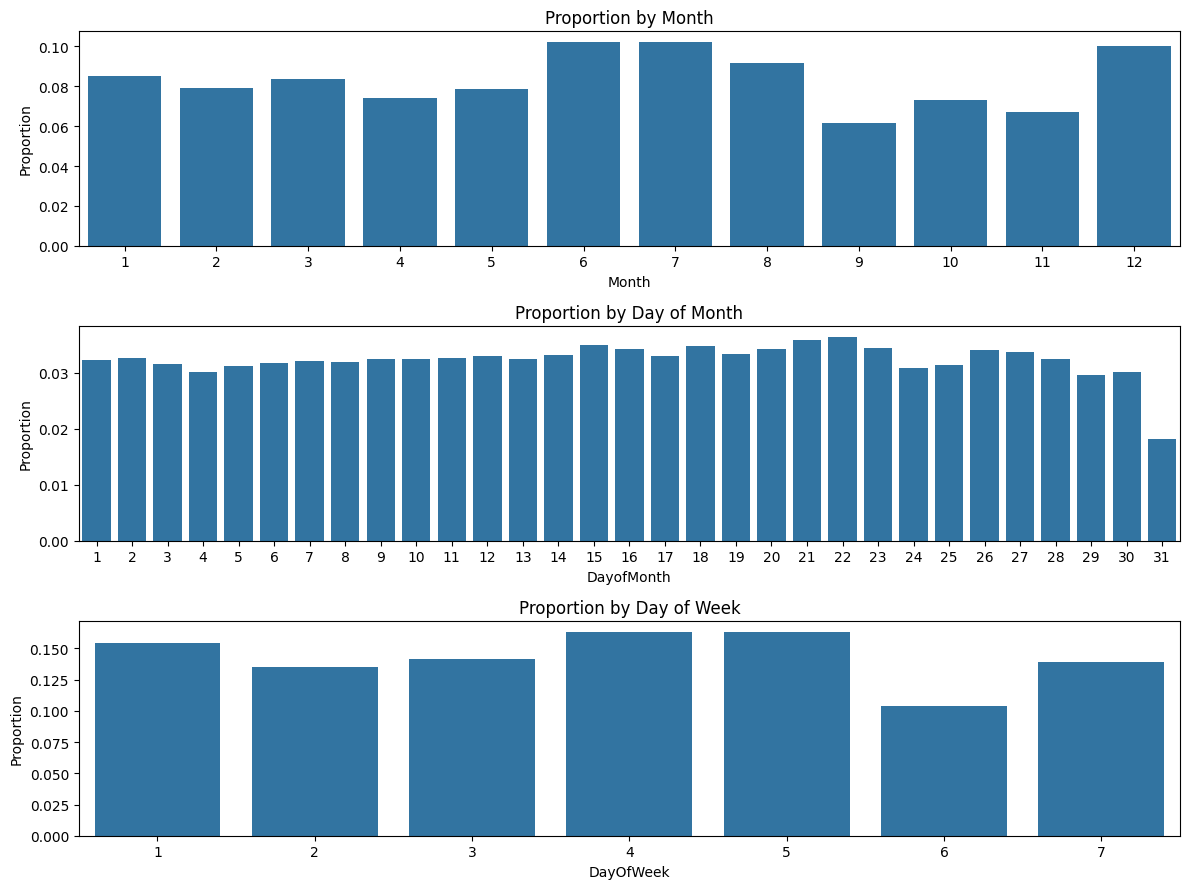

In [30]:
fig, ax = plt.subplots(nrows=3, figsize=[12, 9])

default_color = sns.color_palette()[0]

# Calculate proportions for each plot
month_props = df_cleaned['Month'].value_counts(normalize=True).sort_index()
day_props = df_cleaned['DayofMonth'].value_counts(normalize=True).sort_index()
week_props = df_cleaned['DayOfWeek'].value_counts(normalize=True).sort_index()

# Plot proportions using sns.barplot
sns.barplot(x=month_props.index, y=month_props.values, color=default_color, ax=ax[0])
ax[0].set_ylabel('Proportion')
ax[0].set_title('Proportion by Month')

sns.barplot(x=day_props.index, y=day_props.values, color=default_color, ax=ax[1])
ax[1].set_ylabel('Proportion')
ax[1].set_title('Proportion by Day of Month')

sns.barplot(x=week_props.index, y=week_props.values, color=default_color, ax=ax[2])
ax[2].set_ylabel('Proportion')
ax[2].set_title('Proportion by Day of Week')

# Adjust layout
plt.tight_layout()
plt.show()


  - We can see that month 6,7 and 12 have higher count of flights
  - The flights are somthat distributed across the days of the month
  - The weekdays have higher count of flights than weekends

In [31]:
df_cleaned["AirTime"].min()

np.int32(-685)

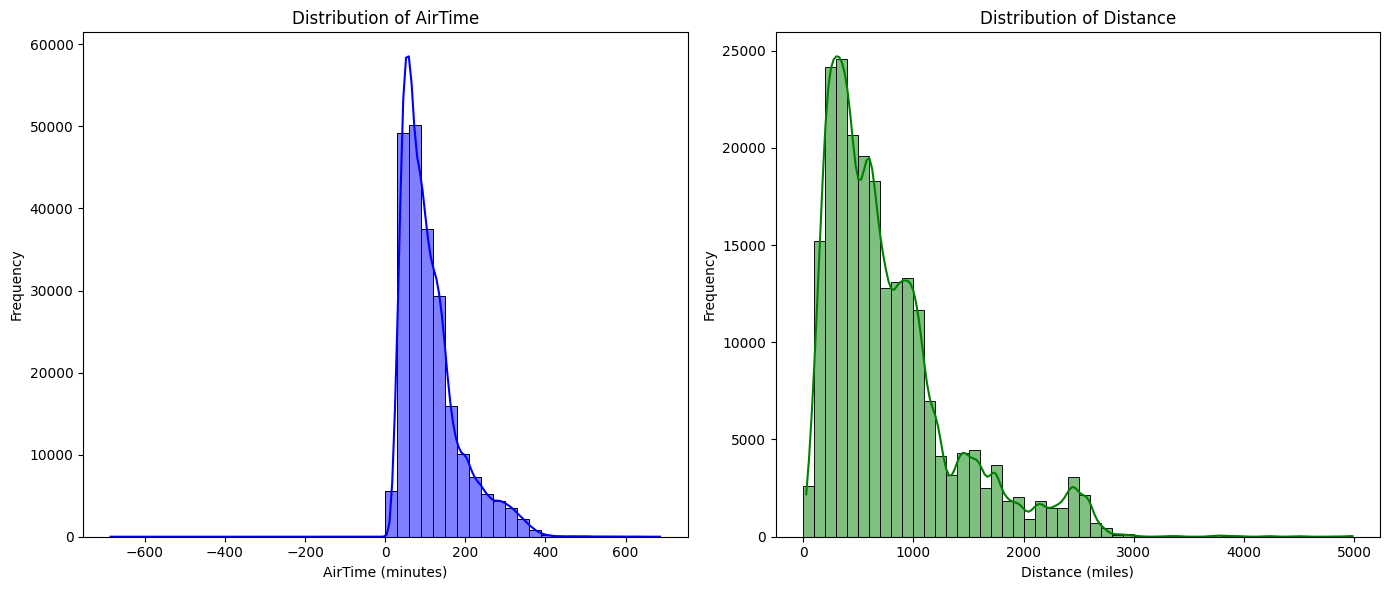

In [32]:
# Create subplots for two histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14, 6])

# Plot histogram for 'AirTime'
bins = np.arange(0, df_cleaned["AirTime"].max() + binsize, 30)
sns.histplot(df_cleaned["AirTime"], bins=bins, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Distribution of AirTime")
ax[0].set_xlabel("AirTime (minutes)")
ax[0].set_ylabel("Frequency")

# Plot histogram for 'Distance'
bins = np.arange(0, df_cleaned["Distance"].max() + binsize, 100)
sns.histplot(df_cleaned["Distance"], bins=bins, kde=True, color="green", ax=ax[1])
ax[1].set_title("Distribution of Distance")
ax[1].set_xlabel("Distance (miles)")
ax[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

We can see that most of the flights are shorter than 1000 since the distance is left skewed. On the other hand we see that we have some negative values in the air time which is surprising. Let explore this

In [33]:
# See how many flights are under 20 minutes.
df_cleaned[df_cleaned['AirTime'] < 20].shape

(702, 26)

Since 20 minutes is very short duration, we will drop these flights for safety.

In [34]:
drop_index = df_cleaned[df_cleaned['AirTime'] < 20].index
df_cleaned.drop(drop_index, inplace=True)
df_cleaned[df_cleaned['AirTime'] < 20].shape

(0, 26)

Text(0, 0.5, 'Frequency')

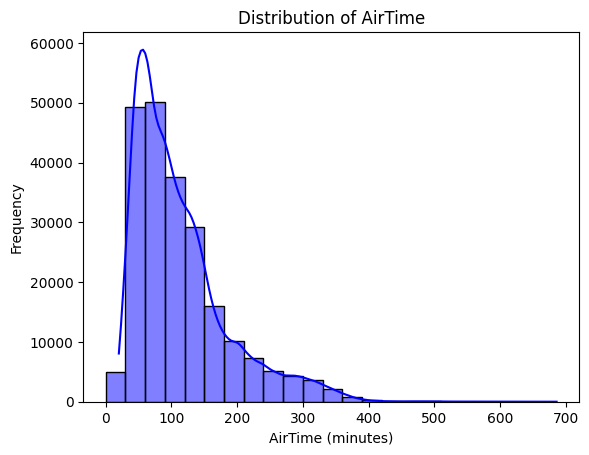

In [35]:
# Replot 
bins = np.arange(0, df_cleaned["AirTime"].max() + binsize, 30)
sns.histplot(df_cleaned["AirTime"], bins=bins, kde=True, color="blue")
plt.title("Distribution of AirTime")
plt.xlabel("AirTime (minutes)")
plt.ylabel("Frequency")

Now we can see that the air time is left skewed where most of the flight fall betwee 1 to 3 hours

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- The distributions of Departure and Arrival Delays looked fairly simlar and we can see that there is a long tail in them.
- After scaling we saw that the departure followed a normal distribution while the arrival was left skewed
- The flights were fairly distributed accross the days but we saw that some months have higher flights and the flights are more during the weekdays
- Lastly the distance was distributed as expected where most of the flights are in the 1 - 3 hours range
- The airtime showed a right tailed distributions due to outliers and incorrrect values
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- The air time had values less that zero which affected the distribution. I removed all the flight with less that 20 minuts of air time for safety to insure the outliers do not affect the analysis.

## Bivariate Exploration

To start we will explore the correlation between the variables

<Axes: >

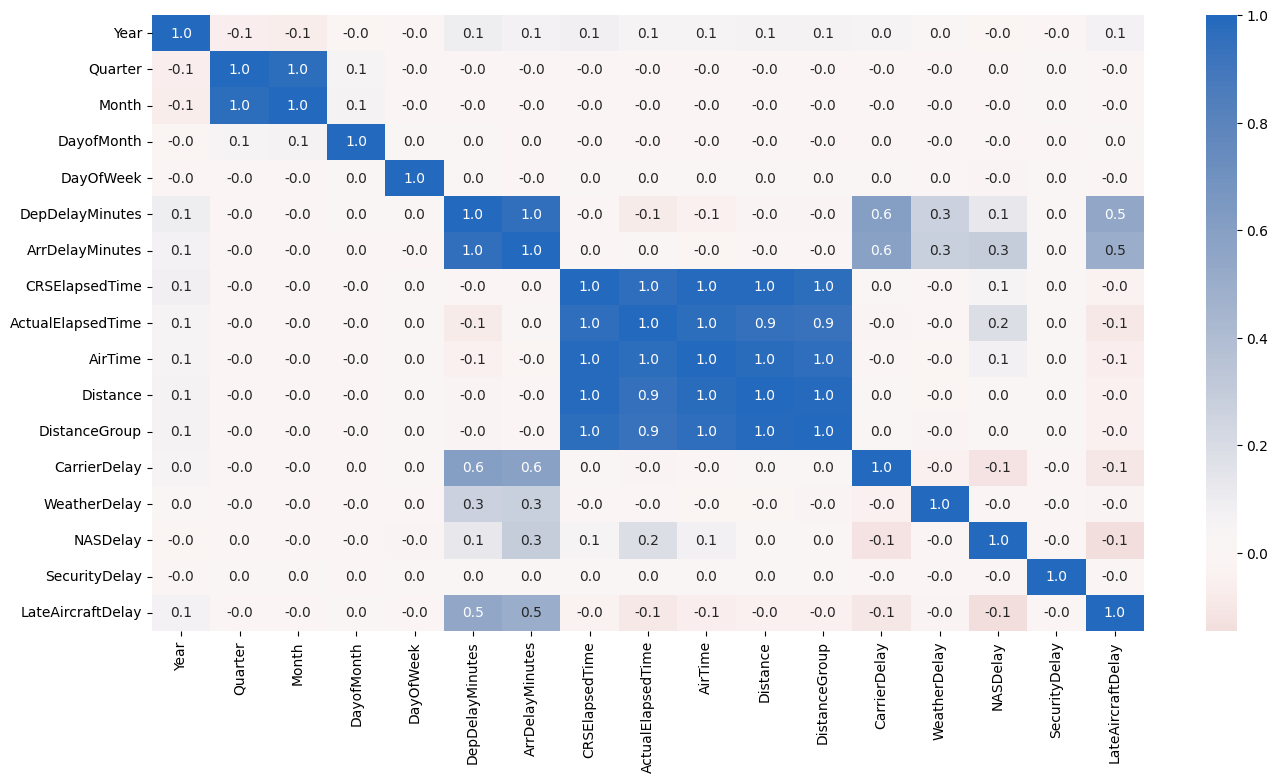

In [36]:
plt.figure(figsize=(16,8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, fmt='.1f', cmap='vlag_r', center=0)

As expected all the delay variables are corrlated with eachother.

Lets explore how each type of delay affect the departure and arrival delay

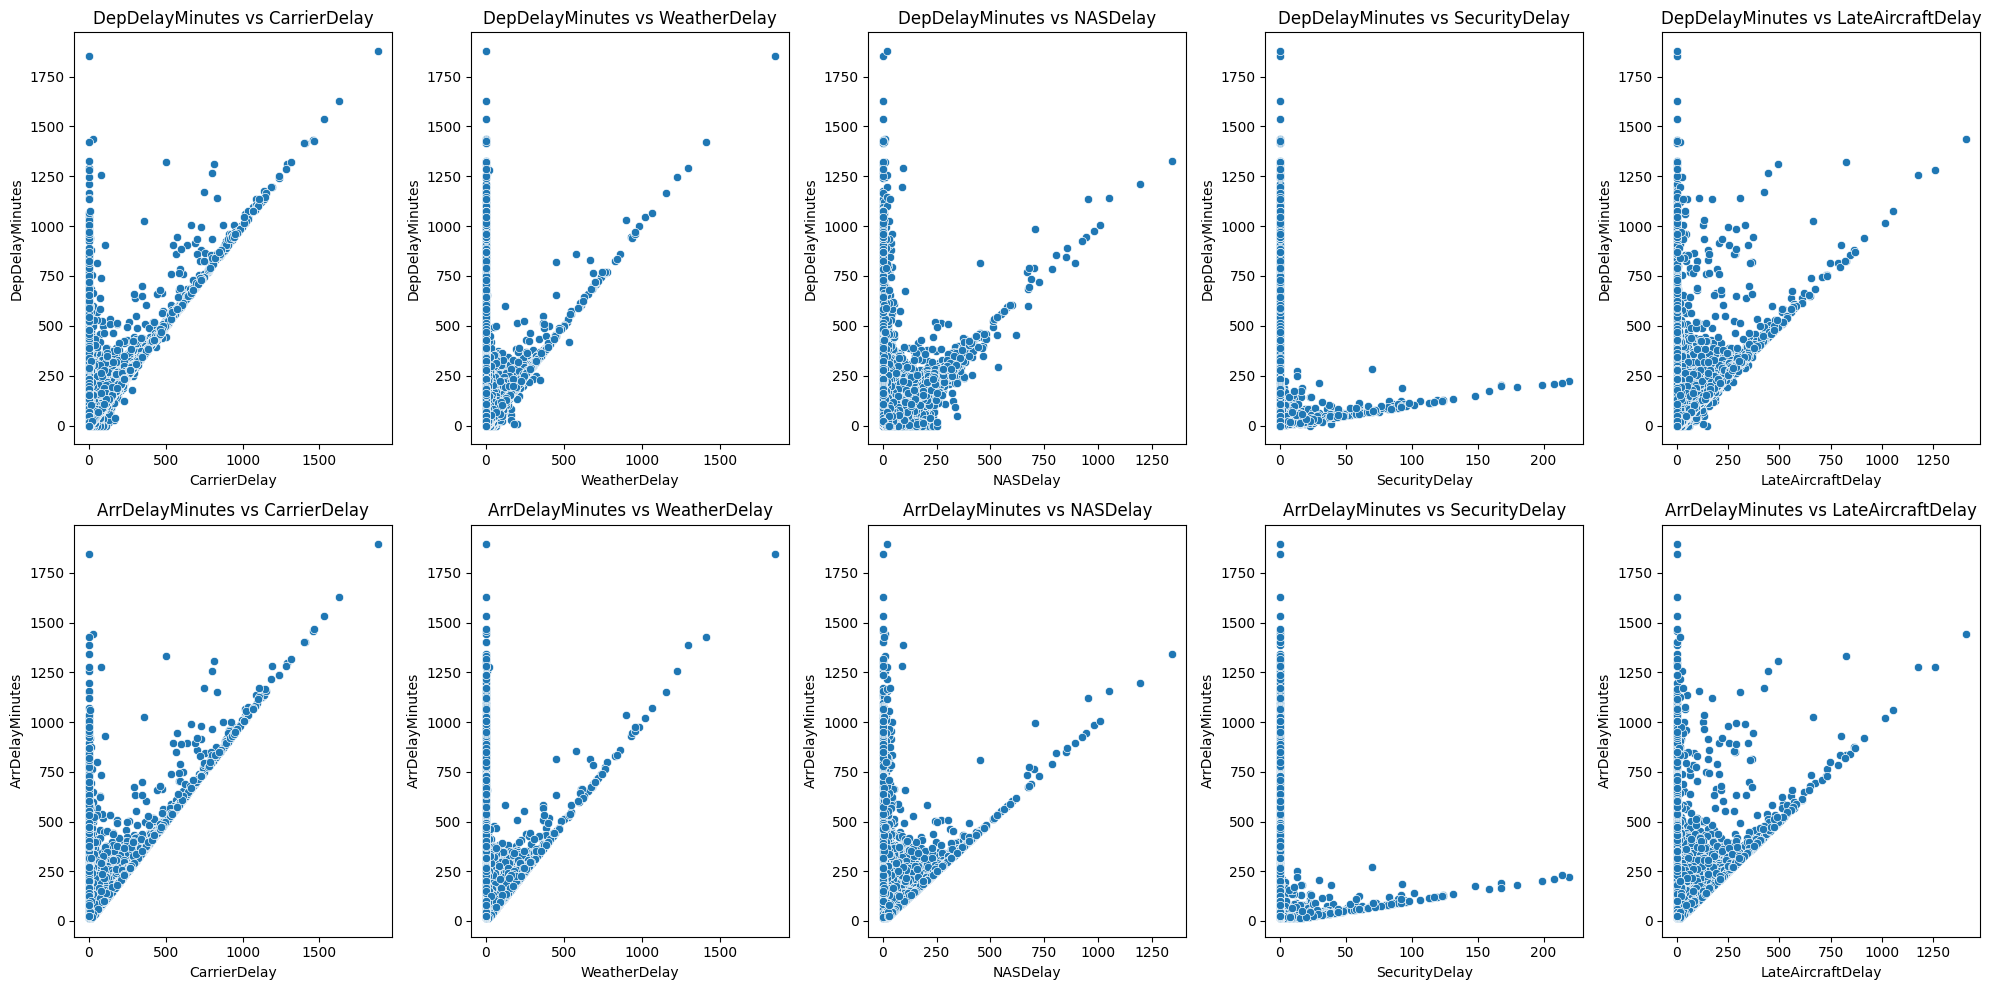

In [37]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# For DepDelayMinutes (first row)
for ax, delay_type in zip(axes[0], ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]):
    sns.scatterplot(
        data=df_cleaned,
        x=delay_type, y="DepDelayMinutes",
        ax=ax
    )
    ax.set_title(f"DepDelayMinutes vs {delay_type}")

# For ArrDelayMinutes (second row)
for ax, delay_type in zip(axes[1], ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]):
    sns.scatterplot(
        data=df_cleaned,
        x=delay_type, y="ArrDelayMinutes",
        ax=ax
    )
    ax.set_title(f"ArrDelayMinutes vs {delay_type}")

plt.tight_layout()
plt.show()

We can see that the delayes are corrlated with the departure and arrival. The intresting part is that the security delay is not strongly corrlated which means most of the flight delay is not a security issue. On the other hand the most corrlated type is the Carrier delay which means that mostly delays are the responsability of the carrier and not the airport.

Now we will see the delayes for each day and month

/var/folders/6c/pm7g0lgx2hdd2gb8p0_k5m980000gn/T/ipykernel_19023/3606632401.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
/var/folders/6c/pm7g0lgx2hdd2gb8p0_k5m980000gn/T/ipykernel_19023/3606632401.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);


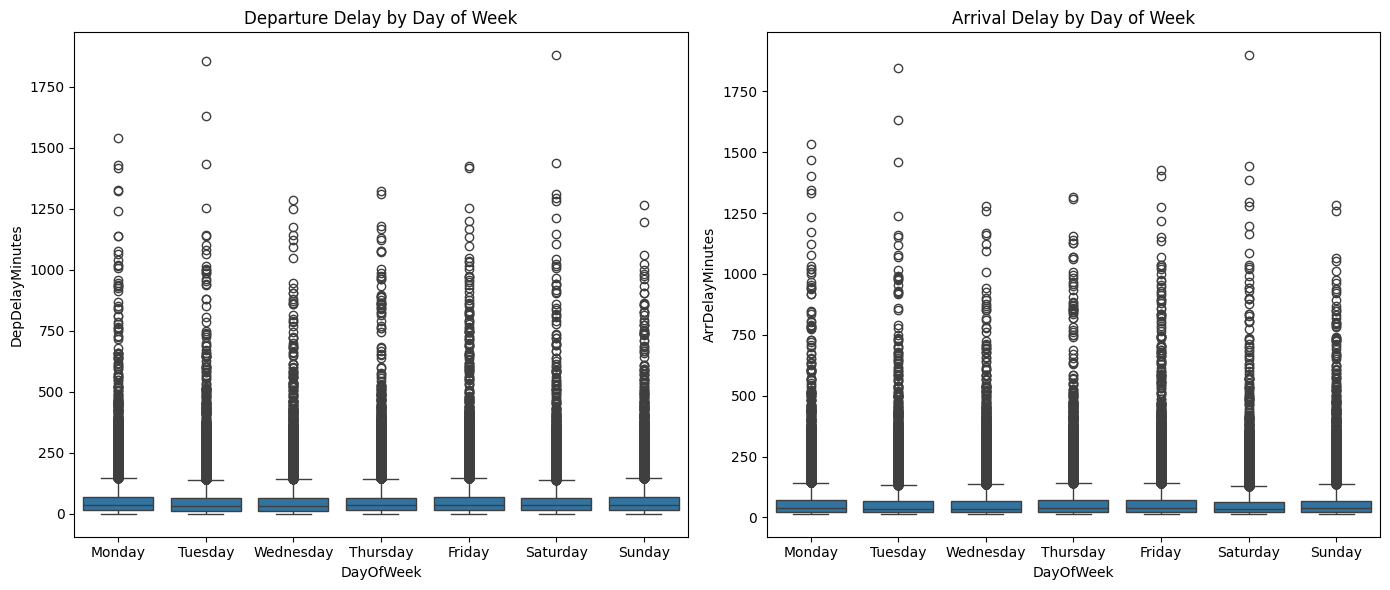

In [38]:
# Set up the figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for DepDelayMinutes
sns.boxplot(
    x='DayOfWeek', y='DepDelayMinutes', data=df_cleaned, ax=axes[0]
);
axes[0].set_title('Departure Delay by Day of Week')
axes[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

# Boxplot for ArrDelayMinutes
sns.boxplot(
    x='DayOfWeek', y='ArrDelayMinutes', data=df_cleaned, ax=axes[1]
);
axes[1].set_title('Arrival Delay by Day of Week')
axes[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

plt.tight_layout()
plt.show()


/var/folders/6c/pm7g0lgx2hdd2gb8p0_k5m980000gn/T/ipykernel_19023/4176222815.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
/var/folders/6c/pm7g0lgx2hdd2gb8p0_k5m980000gn/T/ipykernel_19023/4176222815.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


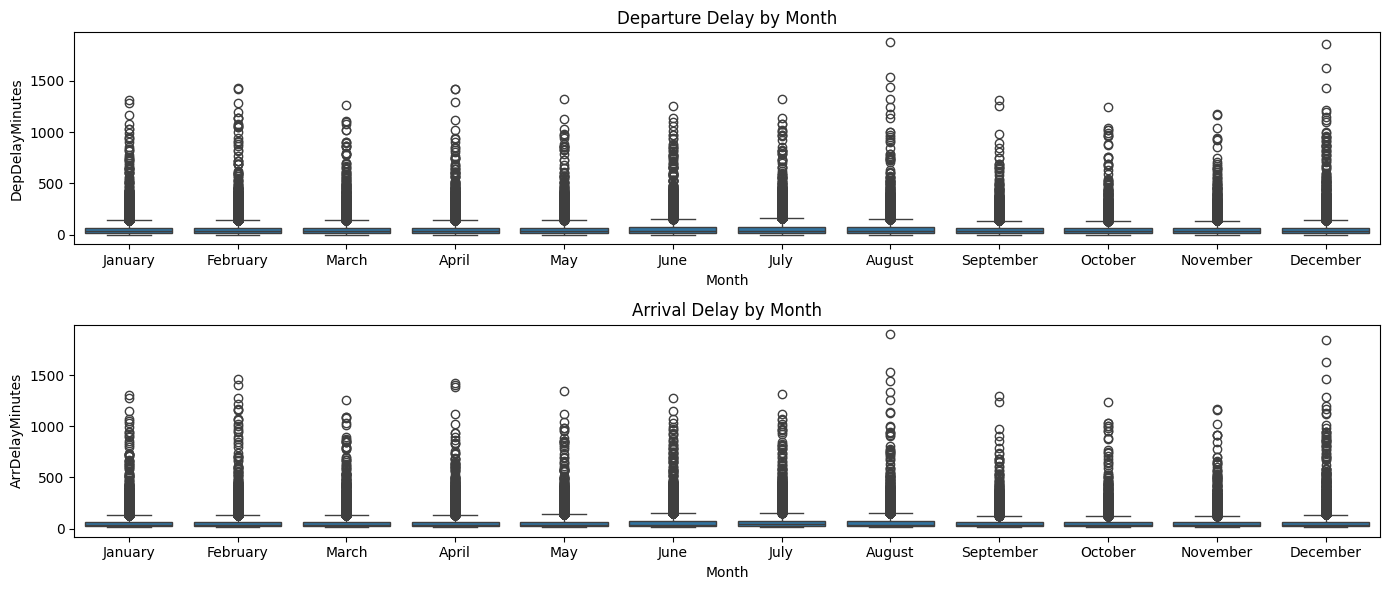

In [39]:
# Set up the figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# Boxplot for DepDelayMinutes
sns.boxplot(
    x='Month', y='DepDelayMinutes', data=df_cleaned, ax=axes[0]
)
axes[0].set_title('Departure Delay by Month')
axes[0].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Boxplot for ArrDelayMinutes
sns.boxplot(
    x='Month', y='ArrDelayMinutes', data=df_cleaned, ax=axes[1]
)
axes[1].set_title('Arrival Delay by Month')
axes[1].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.tight_layout()
plt.show()

We can see that the delay contains large number of outliers which means that longer delays are not very common. Also all the month and days have very similar boxplots

Lastly we will look at departure times and their corrlation with the delay

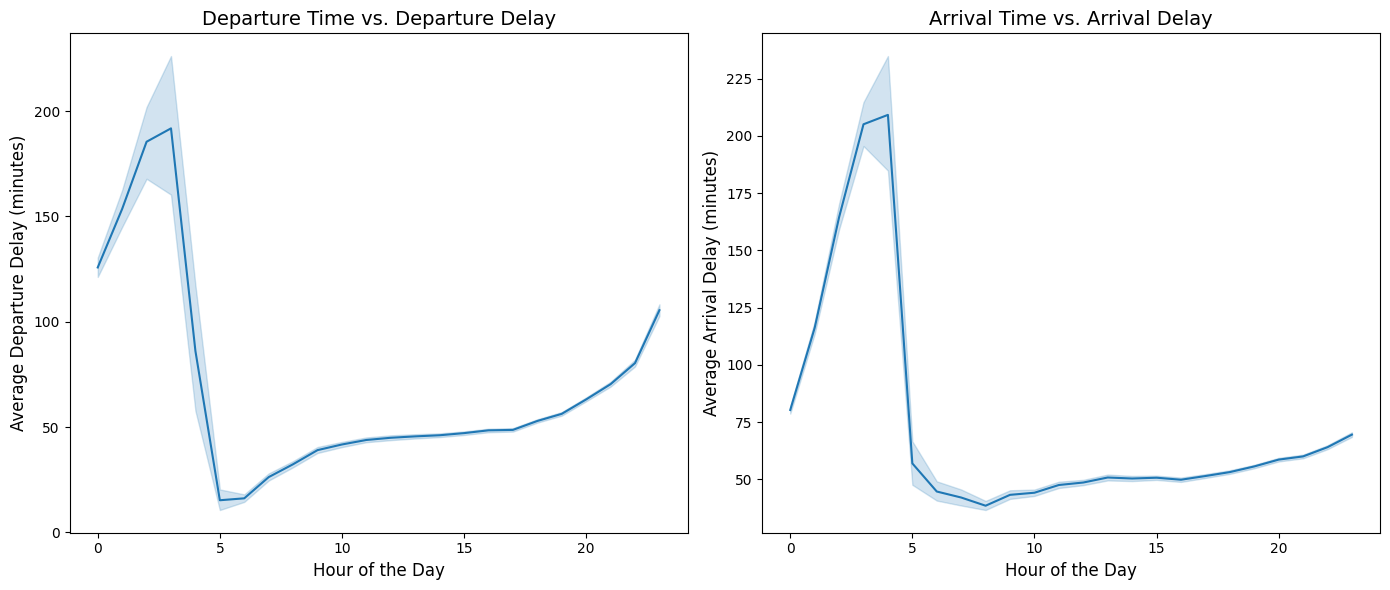

In [40]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for DepTime
sns.lineplot(x=df_cleaned['DepTime'].apply(lambda x: x.hour), y='DepDelayMinutes', data=df_cleaned, ax=axes[0])
axes[0].set_title('Departure Time vs. Departure Delay', fontsize=14)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Average Departure Delay (minutes)', fontsize=12)

# Plot for ArrTime
sns.lineplot(x=df_cleaned['ArrTime'].apply(lambda x: x.hour), y='ArrDelayMinutes', data=df_cleaned, ax=axes[1])
axes[1].set_title('Arrival Time vs. Arrival Delay', fontsize=14)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Average Arrival Delay (minutes)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

We can see very clearly that early that larger delayes occur at the start of the day and keep decreasing until 5 maybe this is because of the nightshift having less employees

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. **Delay Types Correlation**:
   - The different types of delays (Carrier, Weather, NAS, Security, and Late Aircraft) showed strong correlations with both departure and arrival delays. 
   - **Carrier Delay** had the highest correlation with both `DepDelayMinutes` and `ArrDelayMinutes`, suggesting that the primary factor for delays is often the responsibility of the carrier, such as issues like aircraft maintenance or scheduling.
   - **Security Delay** showed weak correlation with both `DepDelayMinutes` and `ArrDelayMinutes`, indicating that security-related issues are less likely to be the cause of delays compared to other factors.
   
2. **Day of the Week**:
   - The boxplots showed that the delays (both departure and arrival) are fairly consistent across the days of the week. No specific day stood out with significantly higher or lower delays, meaning that delays are spread relatively evenly throughout the week.

3. **Month of the Year**:
   - Similarly to the days of the week, the delays were also fairly consistent across the months. However, there were a few months with higher instances of delays, but overall, there was no significant seasonal pattern.
   
4. **Departure and Arrival Times**:
   - The line plots for `DepTime` and `ArrTime` revealed a clear pattern where delays are higher during the early morning hours, particularly in the first few hours of the day. This could be attributed to factors like fewer staff members during night shifts or earlier flights encountering issues that accumulate throughout the day.
   - Delays decrease significantly after the morning hours and reach a relatively steady low in the afternoon and evening hours. This might suggest better operational efficiency during peak times.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. **Correlation between the Delay Variables**:
   - The correlation heatmap showed that the different delay types (Carrier, Weather, NAS, Security, Late Aircraft) were all strongly correlated with each other. This makes sense, as multiple factors can contribute to the total delay, and they often work together to affect the total delay times. For instance, a `CarrierDelay` could be compounded by `LateAircraftDelay`, leading to a combined increase in delays.

2. **Hour of the Day**:
   - The investigation of `DepTime` and `ArrTime` showed that delays are not distributed uniformly throughout the day. Early morning hours saw higher delays, likely due to the lower staffing levels or other operational inefficiencies.

## Multivariate Exploration
In this section I want to focus on the departure and arrival time and their affect on the delay variables

In [41]:
# Extract the hour from DepTime, since it's a datetime.time object
df_cleaned['DepHour'] = df_cleaned['DepTime'].apply(lambda x: x.hour)
# Extract the hour from ArrTime, since it's a datetime.time object
df_cleaned['ArrHour'] = df_cleaned['ArrTime'].apply(lambda x: x.hour)

In [42]:
def hist2dgrid(x, y, **kwargs):
    """
    Creates a 2D histogram (heatmap) for visualizing the relationship between two numerical variables.
    
    Parameters:
    - x: array-like
        The x-axis values, typically representing the hour of the day or other continuous variable.
    - y: array-like
        The y-axis values, typically representing departure delay minutes or other continuous variable.
    - **kwargs: Additional keyword arguments
        Accepts 'color' for the colormap to be used for the heatmap.
    
    The function creates a 2D histogram with specified bin sizes, colors, and axis ticks to visualize 
    the distribution of two variables. This is commonly used for visualizing the distribution of delays 
    across different hours of the day.
    """
    palette = kwargs.pop('color')
    
    # Set the bins for x (hour of the day) and y (departure delay minutes)
    bins_x = np.arange(0, 24, 1)  # Hour of the day from 0 to 23
    bins_y = np.arange(0, 200, 10)  # Departure delay in 10-minute increments
    
    # Create the 2D histogram
    plt.hist2d(x, y, bins=[bins_x, bins_y], cmap=palette, cmin=0.5)
    
    # Customize x and y ticks
    plt.xticks(np.arange(0, 24, 4), np.arange(0, 24, 4))
    plt.yticks(np.arange(0, 201, 50), [f'{i}' for i in np.arange(0, 201, 50)])


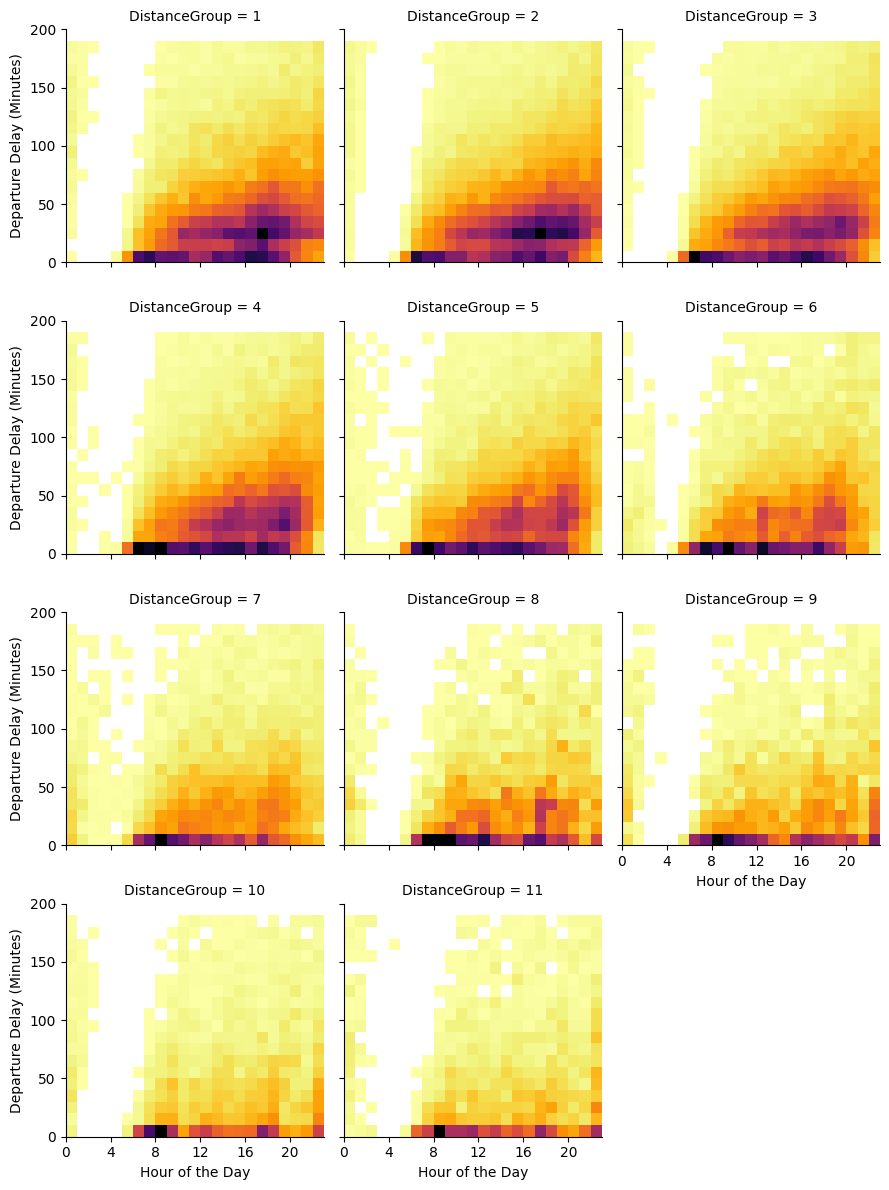

In [43]:
g = sns.FacetGrid(df_cleaned, col='DistanceGroup', col_wrap=3, height=3)

# Apply the custom 2D heatmap function to each facet
g.map(hist2dgrid, 'DepHour', 'DepDelayMinutes', color='inferno_r')

# Set the axis labels
g.set_xlabels('Hour of the Day')
g.set_ylabels('Departure Delay (Minutes)')

# Show the plot
plt.tight_layout()
plt.show()

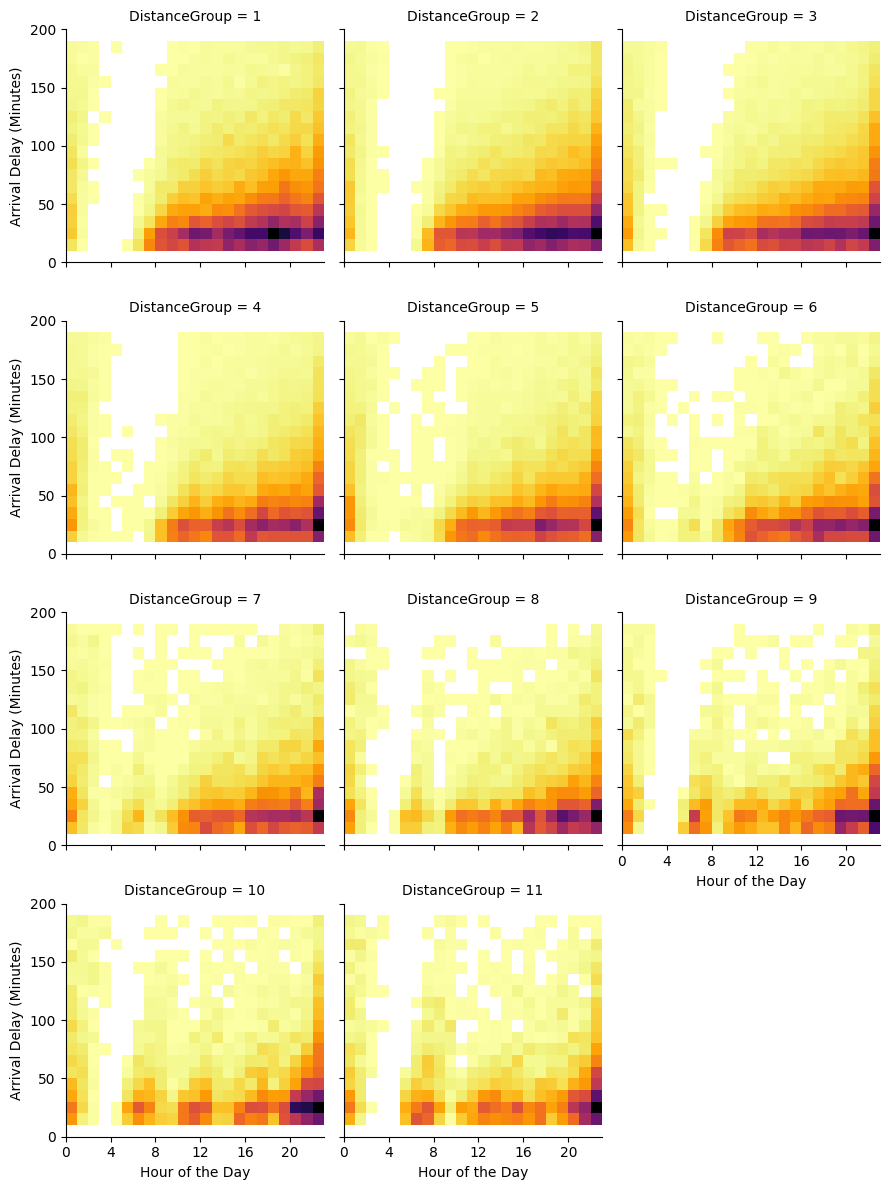

In [44]:
g = sns.FacetGrid(df_cleaned, col='DistanceGroup', col_wrap=3, height=3)

# Apply the custom 2D heatmap function to each facet
g.map(hist2dgrid, 'ArrHour', 'ArrDelayMinutes', color='inferno_r')

# Set the axis labels
g.set_xlabels('Hour of the Day')
g.set_ylabels('Arrival Delay (Minutes)')

# Show the plot
plt.tight_layout()
plt.show()

We can see that flight with less distance typically have more delay. And since most of the flight are between 12 - 20 we see a darker color 

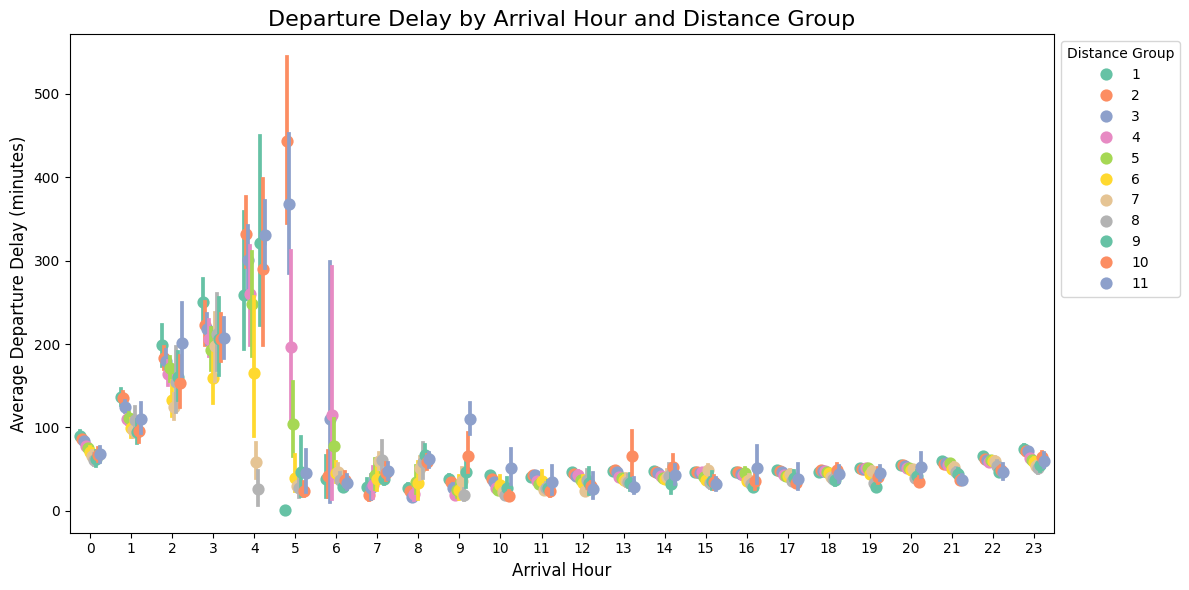

In [45]:

# Create the pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_cleaned, x='ArrHour', hue='DistanceGroup', y='DepDelayMinutes', palette='Set2', 
              dodge=0.5, linestyles='', markers='o')

# Fix legend
plt.legend(title='Distance Group', loc='upper left', bbox_to_anchor=(1, 1))

# Add title and labels
plt.title('Departure Delay by Arrival Hour and Distance Group', fontsize=16)
plt.xlabel('Arrival Hour', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- We can see that flight with less distance typically have more delay. And since most of the flight are between 12 - 20 we see a darker color.
- All the distacne groups face larger delays early in the morning.
### Were there any interesting or surprising interactions between features?
The time interaction is intresting since the delay increases substantially from 3 to 5 and then significantly decrease.

## Conclusions
In this analysis, we explored the patterns and relationships within flight delay data, focusing on various factors that could influence delays such as carrier issues, weather, security, and the time of day. Through both univariate and bivariate exploration, we identified several key findings:

1. **Carrier Delays**: We observed that **Carrier Delay** had the highest correlation with both departure and arrival delays, which suggests that a significant portion of flight delays can be attributed to issues within the airline's operations, such as maintenance, scheduling, and aircraft availability.
   
2. **Time of Day**: Delays tend to be more frequent during the early morning hours, particularly between 3 AM and 5 AM. This could be due to operational inefficiencies or lower staffing levels during these hours. Delays significantly decrease as the day progresses, indicating better operational coordination during peak times.

3. **Flight Distance**: A surprising relationship emerged where shorter flights experienced more delays. This could be due to factors such as reduced time for turnarounds, operational bottlenecks at smaller airports, or other logistical challenges specific to short-haul flights.

4. **Outliers and Distribution**: We also identified that delay variables contain a large number of outliers, particularly in both departure and arrival delays, with long tail distributions. While such extreme delays are rare, they can significantly affect overall delay averages. This necessitates further analysis to better understand the underlying causes of such outliers.

### Reflection on the Data Exploration Process:
Through this exploratory analysis, we not only identified the primary factors influencing flight delays but also highlighted time-based patterns and how they interact with other features like distance and carrier responsibilities. The stepwise approach taken—starting with individual variable exploration, moving to bivariate analysis, and finally examining more complex relationships—provided clear insights into the operational factors that need further attention.

### Recommendations for Future Work:
- **Operational Focus**: Future analysis could dive deeper into the reasons behind high early-morning delays, particularly looking into staff availability or airport operational constraints.
- **Outlier Investigation**: Further investigation into the extreme outliers in delay times could provide insights into rare but impactful events, such as system failures or major disruptions.
- **Distance-related Delays**: A closer look at why shorter flights experience more delays could help pinpoint operational or logistical issues that disproportionately affect these routes.

In conclusion, this analysis underscores the complexity of flight delays, highlighting the interplay between multiple factors such as carrier delays, time of day, and flight distance. By addressing these key areas, there is potential to improve the overall efficiency and reliability of air travel.


In [46]:
df_cleaned.to_csv("cleaned_airline.csv",index=False)

In [47]:
!jupyter nbconvert --to html DOT_Flights_Exploration.ipynb

[NbConvertApp] Converting notebook DOT_Flights_Exploration.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1792588 bytes to DOT_Flights_Exploration.html
